In [3]:
import csv

# Đường dẫn tới tệp gốc và tệp đã làm sạch
input_file = "E:/coco_dataset/output/object_info_parallel.csv"
cleaned_file = "E:/coco_dataset/cleaned_object_info.csv"

def clean_csv(input_file, output_file, expected_columns=7):
    valid_count = 0
    invalid_count = 0

    with open(input_file, "r") as infile, open(output_file, "w", newline='') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)

        for line_num, row in enumerate(reader):
            if len(row) == expected_columns:
                writer.writerow(row)
                valid_count += 1
            else:
                print(f"dòng {line_num + 1} không hợp lệ: {row}")
                invalid_count += 1

    return valid_count, invalid_count

# Chạy làm sạch dữ liệu
valid, invalid = clean_csv(input_file, cleaned_file)
print(f"Đã xử lý {valid} dòng hợp lệ.")
print(f"Đã bỏ qua {invalid} dòng không hợp lệ.")


dòng 10 không hợp lệ: []
dòng 21 không hợp lệ: ['e']
dòng 37 không hợp lệ: ['se']
dòng 40 không hợp lệ: []
dòng 46 không hợp lệ: []
dòng 55 không hợp lệ: []
dòng 63 không hợp lệ: ['000000219578.jpg', '2', '63', '40956', '273280', '14.986826697892273', '000000329323.jpg', '0', '1', '23123', '272000', '8.501102941176471', 'False']
dòng 66 không hợp lệ: []
dòng 70 không hợp lệ: []
dòng 72 không hợp lệ: ['000000301867.jpg', '0', '28', '10849', '307200', '3.5315755208333335', 'Fa000000312421.jpg', '1', '67', '12418', '273280', '4.54405737704918', 'False']
dòng 82 không hợp lệ: []
dòng 85 không hợp lệ: ['alse']
dòng 86 không hợp lệ: []
dòng 89 không hợp lệ: []
dòng 92 không hợp lệ: []
dòng 94 không hợp lệ: ['e']
dòng 97 không hợp lệ: []
dòng 113 không hợp lệ: ['se']
dòng 115 không hợp lệ: []
dòng 118 không hợp lệ: []
dòng 123 không hợp lệ: []
dòng 128 không hợp lệ: []
dòng 130 không hợp lệ: ['se']
dòng 131 không hợp lệ: ['e']
dòng 137 không hợp lệ: []
dòng 147 không hợp lệ: ['e']
dòng 162 kh

In [6]:
import pandas as pd

# Đọc tệp đã làm sạch
data = pd.read_csv(cleaned_file)

# Thêm cột phân nhóm theo phần trăm diện tích
bins = [0, 2, 10, 20, 50, 80, 100]
labels = ["0-2%", "2-10%", "10-20%", "20-50%", "50-80%", ">80%"]
data['Area_Percentage_Group'] = pd.cut(data['object_area_percentage'], bins=bins, labels=labels, right=False)

print("Dữ liệu đã được đọc và chuẩn bị:")
print(data.head())


Dữ liệu đã được đọc và chuẩn bị:
         image_name  object_id  category_id  object_area  image_area  \
0  000000037777.jpg          3           67         6362       80960   
1  000000037777.jpg          4           82         7179       80960   
2  000000037777.jpg          6           79         3719       80960   
3  000000397133.jpg          1           67        54331      273280   
4  000000252219.jpg          0            1         8868      273920   

   object_area_percentage  background_removed Area_Percentage_Group  
0                7.858202               False                 2-10%  
1                8.867342               False                 2-10%  
2                4.593626               False                 2-10%  
3               19.881074               False                10-20%  
4                3.237442               False                 2-10%  


In [7]:
# Thống kê số lượng vật thể theo nhóm
group_counts = data['Area_Percentage_Group'].value_counts().sort_index()
print("Số lượng vật thể theo nhóm phần trăm diện tích:")
print(group_counts)


Số lượng vật thể theo nhóm phần trăm diện tích:
Area_Percentage_Group
0-2%         0
2-10%     4473
10-20%    1386
20-50%    1041
50-80%     187
>80%        91
Name: count, dtype: int64


In [8]:
# Thống kê tổng diện tích vật thể theo nhóm
group_areas = data.groupby('Area_Percentage_Group', observed=False)['object_area'].sum()
print("Tổng diện tích vật thể theo nhóm phần trăm diện tích:")
print(group_areas)


Tổng diện tích vật thể theo nhóm phần trăm diện tích:
Area_Percentage_Group
0-2%             0
2-10%     57368773
10-20%    54610870
20-50%    87782324
50-80%    32084136
>80%      23172570
Name: object_area, dtype: int64


In [9]:
# Thống kê số lượng vật thể trên mỗi ảnh
image_object_counts = data['image_name'].value_counts()
print("Thống kê số lượng vật thể trên mỗi ảnh:")
print(image_object_counts.describe())


Thống kê số lượng vật thể trên mỗi ảnh:
count    3573.000000
mean        2.009236
std         1.331702
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: count, dtype: float64


In [10]:
# Thống kê tổng diện tích vật thể trên mỗi ảnh
image_total_area = data.groupby('image_name')['object_area'].sum()
print("Thống kê tổng diện tích vật thể trên mỗi ảnh:")
print(image_total_area.describe())


Thống kê tổng diện tích vật thể trên mỗi ảnh:
count      3573.000000
mean      71450.308704
std       69778.329504
min        1593.000000
25%       21611.000000
50%       48898.000000
75%       97209.000000
max      624886.000000
Name: object_area, dtype: float64


In [11]:
# Thống kê phân bố số lượng vật thể theo danh mục
category_counts = data['category_id'].value_counts()
print("Phân bố số lượng vật thể theo danh mục:")
print(category_counts)


Phân bố số lượng vật thể theo danh mục:
category_id
1     2229
67     288
62     263
51     163
3      147
      ... 
37       6
90       3
40       3
89       1
80       1
Name: count, Length: 80, dtype: int64


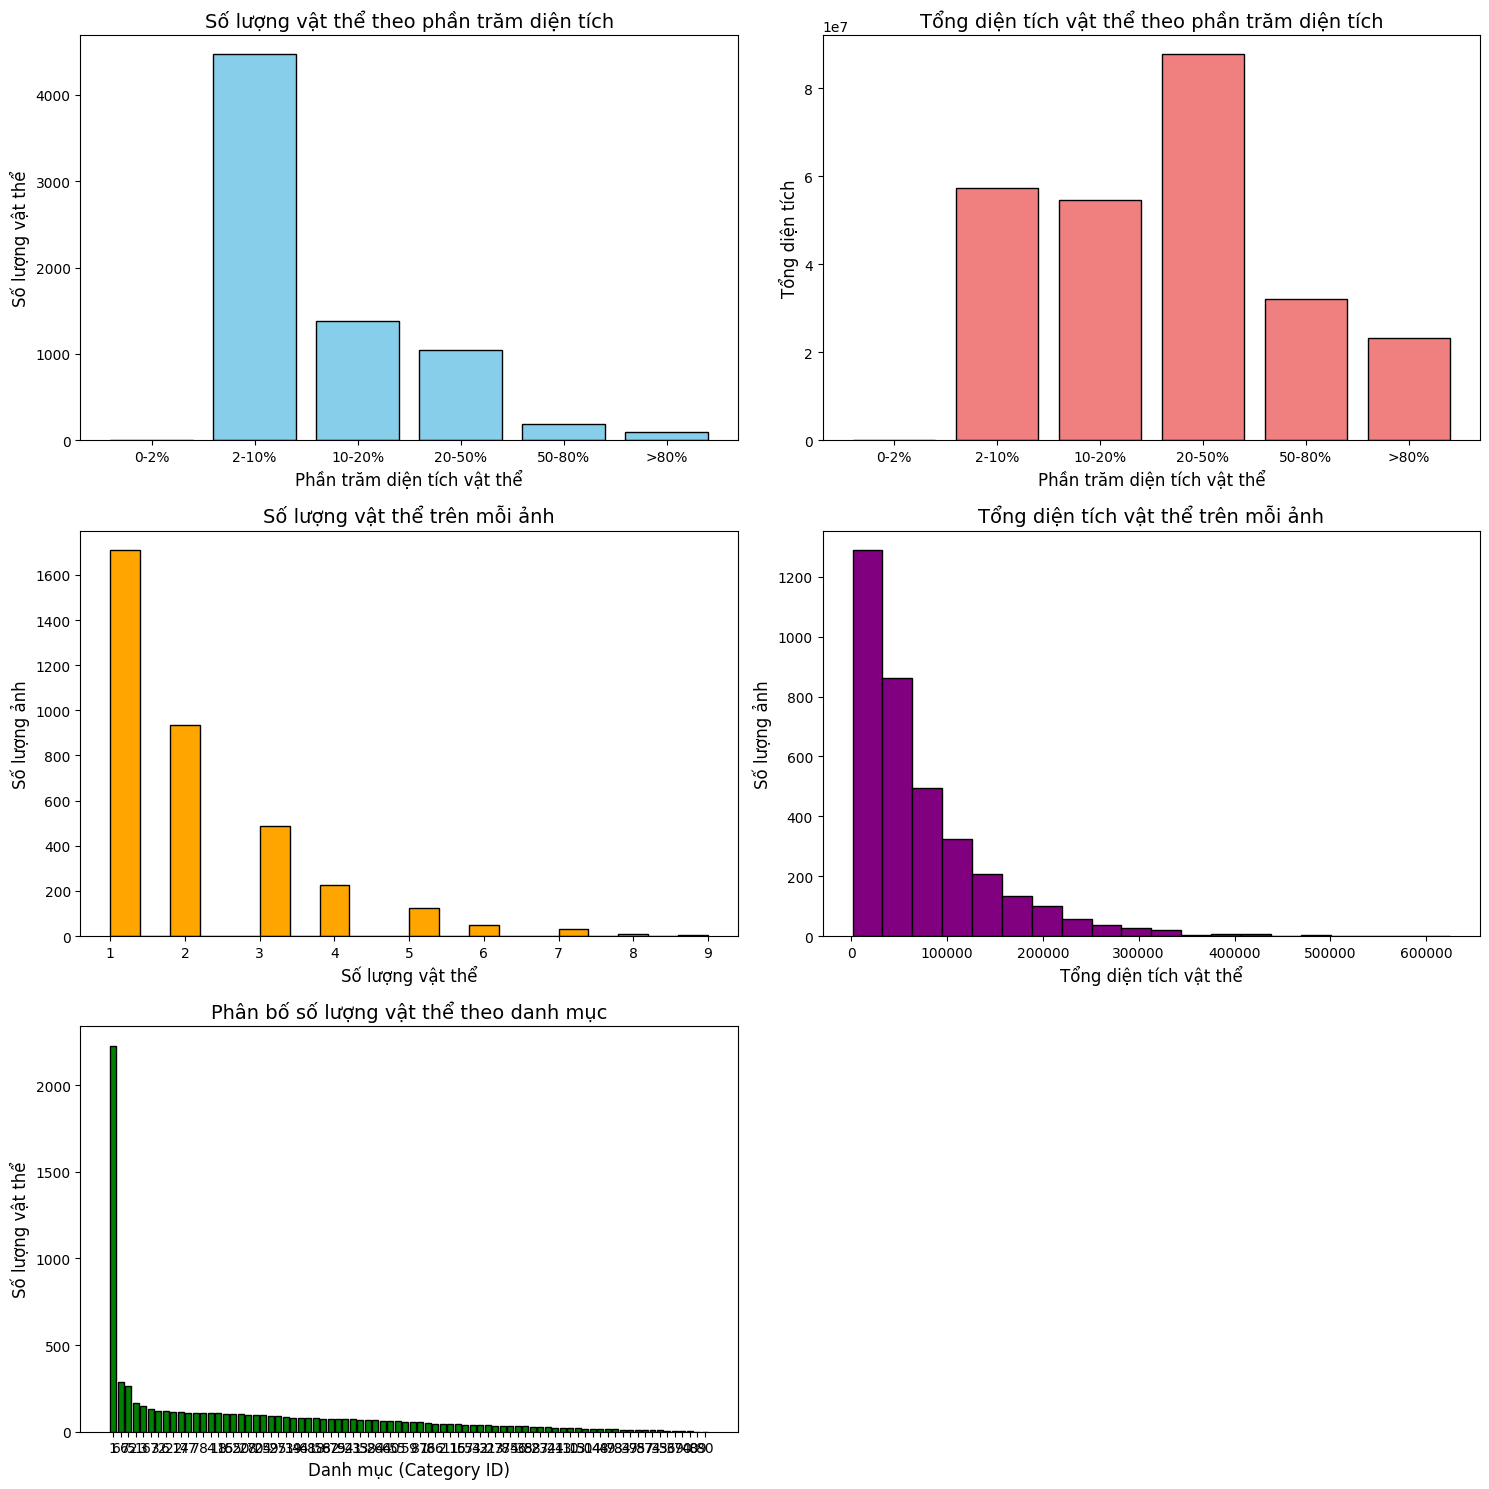

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Biểu đồ 1: Số lượng vật thể theo phần trăm diện tích
axes[0, 0].bar(group_counts.index.astype(str), group_counts, color='skyblue', edgecolor='black')
axes[0, 0].set_title("Số lượng vật thể theo phần trăm diện tích", fontsize=14)
axes[0, 0].set_xlabel("Phần trăm diện tích vật thể", fontsize=12)
axes[0, 0].set_ylabel("Số lượng vật thể", fontsize=12)

# Biểu đồ 2: Tổng diện tích vật thể theo phần trăm diện tích
axes[0, 1].bar(group_areas.index.astype(str), group_areas, color='lightcoral', edgecolor='black')
axes[0, 1].set_title("Tổng diện tích vật thể theo phần trăm diện tích", fontsize=14)
axes[0, 1].set_xlabel("Phần trăm diện tích vật thể", fontsize=12)
axes[0, 1].set_ylabel("Tổng diện tích", fontsize=12)

# Biểu đồ 3: Số lượng vật thể trên mỗi ảnh
axes[1, 0].hist(image_object_counts, bins=20, color='orange', edgecolor='black')
axes[1, 0].set_title("Số lượng vật thể trên mỗi ảnh", fontsize=14)
axes[1, 0].set_xlabel("Số lượng vật thể", fontsize=12)
axes[1, 0].set_ylabel("Số lượng ảnh", fontsize=12)

# Biểu đồ 4: Tổng diện tích vật thể trên mỗi ảnh
axes[1, 1].hist(image_total_area, bins=20, color='purple', edgecolor='black')
axes[1, 1].set_title("Tổng diện tích vật thể trên mỗi ảnh", fontsize=14)
axes[1, 1].set_xlabel("Tổng diện tích vật thể", fontsize=12)
axes[1, 1].set_ylabel("Số lượng ảnh", fontsize=12)

# Biểu đồ 5: Phân bố số lượng vật thể theo danh mục
axes[2, 0].bar(category_counts.index.astype(str), category_counts, color='green', edgecolor='black')
axes[2, 0].set_title("Phân bố số lượng vật thể theo danh mục", fontsize=14)
axes[2, 0].set_xlabel("Danh mục (Category ID)", fontsize=12)
axes[2, 0].set_ylabel("Số lượng vật thể", fontsize=12)

# Tắt trục không cần thiết cho biểu đồ cuối cùng
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()


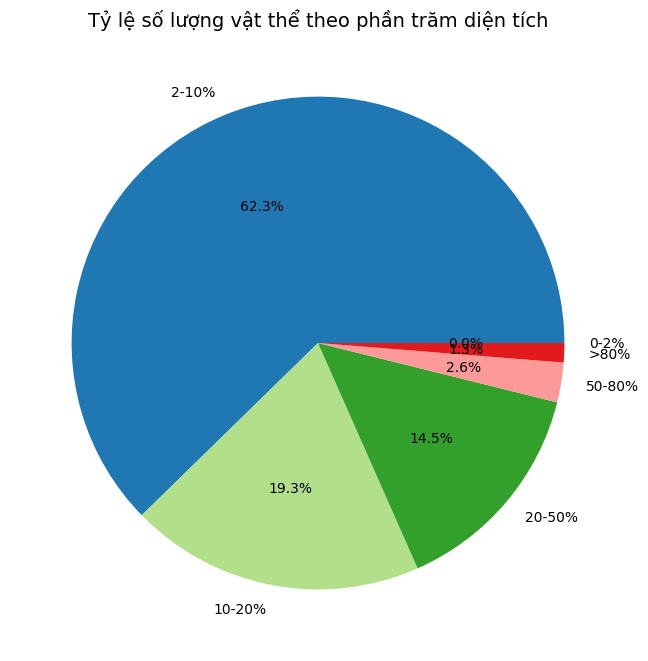

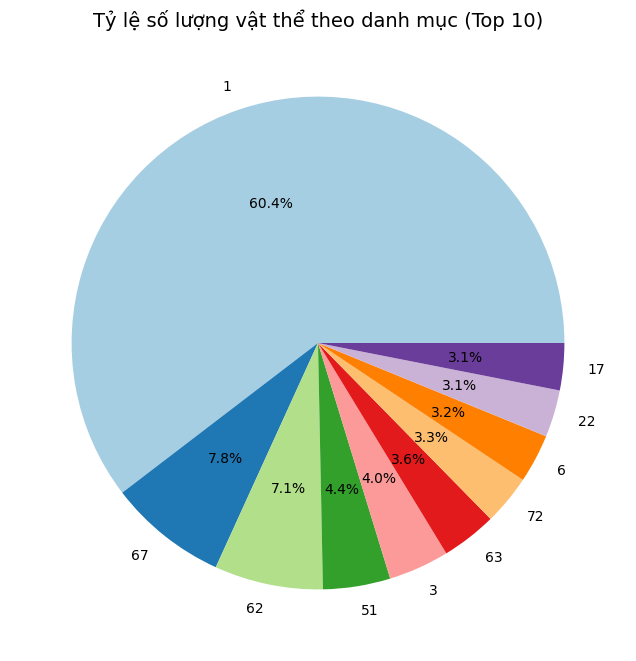

In [14]:
import matplotlib.pyplot as plt

# Biểu đồ tròn 1: Tỷ lệ số lượng vật thể theo phần trăm diện tích
plt.figure(figsize=(8, 8))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Tỷ lệ số lượng vật thể theo phần trăm diện tích", fontsize=14)
plt.show()

# Biểu đồ tròn 2: Phân bố số lượng vật thể theo danh mục
top_categories = category_counts.head(10)  # Lấy 10 danh mục đầu tiên
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Tỷ lệ số lượng vật thể theo danh mục (Top 10)", fontsize=14)
plt.show()
